In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing #引入sklearn中的标准化模块
from scipy import interpolate
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split

data=[]
buffersize = 100
length = 8000
path ="./data20231212"
files= os.listdir(path)


In [2]:
#TODO: 清洗数据


data_cleaned=[]

def get_data(path):
    files= os.listdir(path)
    
    data_output = []
    for file in files:
        data_process = []
        if not os.path.isdir(file):
            print(file)
            f = open(path+"/"+file)
            iter_f = iter(f)
            for line in iter_f:
                line = line.replace("\n","")
                data_process.append(line)
        data_output.append(data_process)
    return data_output
        
# 数据清洗

def clean_data_float(data):
    processed_data = []
    for i in range(0,len(data)):
        tmp=np.array(data[i])
        for j in range(0,len(data[i])):    
            try:
                tmp[j] = float(data[i][j])
            except:
                print("error")
                print(data[i][j])
                tmp[j] = np.nan
                #先这样吧
        
        tmp=tmp[0:length]
        


        interpolate_data(tmp)

        

        
        splited_data=split_data(tmp,buffersize)








        processed_data.append(splited_data)



            
    return processed_data   





def interpolate_data(tmp):
    #插值

    #for i in range(0,len(tmp)):
    #    if np.isnan(tmp[i]):
    #        tmp[i] = 0
    #tmp=pd.Series(tmp)
    #什么玩意，屁用没有
    
    #x = np.arange(len(tmp))
    #f = interpolate.interp1d(x, tmp,kind="linear")
    #xnew = np.arange(0,len(tmp)-1,1)
    #tmp = f(xnew)
    #print(type(tmp))
    #print(tmp.shape)
    for i in range(0,len(tmp)):
        if tmp[i] == np.nan:
            tmp[i] = np.mean(tmp[i-1],tmp[i+1])
    '''
    #tmp = tmp.dropna()
    #print(type(tmp))
    tmp = tmp.fillna(0)
    #tmp = tmp.values    
    '''
    #for i in range(0,len(tmp)):
    #    if np.isnan(tmp[i]):
    #        tmp[i] = 0
    #tmp = tmp.interpolate(method='linear')
    #tmp.tolist()
    #print(type(tmp))
    return tmp

def split_data(tmp,buffersize):
    split_data=[]
    for k in range(0,len(tmp),buffersize):
        tmptmp=tmp[k:k+buffersize]
        #print(tmptmp.shape)
        #normalize the 1d matrix
        tmptmp = np.array(tmptmp)
        tmptmp = tmptmp.reshape(-1,1)
        
        #print(tmptmp.shape)
        scaler=preprocessing.MinMaxScaler()
        tmptmp = scaler.fit_transform(tmptmp)
        tmptmp = tmptmp.squeeze()
        #nan to 0
        
        for i in range(0,len(tmptmp)):
            if np.isnan(tmptmp[i]):
                tmptmp[i] = 0.5
    
        tmptmp = tmptmp.tolist()
        
        split_data.append(tmptmp)

        
    return split_data


# nomalize the data using pandas


In [3]:
data = get_data(path)

data1 = clean_data_float(data)



AM.txt
C.txt
DM.txt
EM.txt
F.txt
G.txt
NOISE.txt
error

error
-7642.4-6904.000000


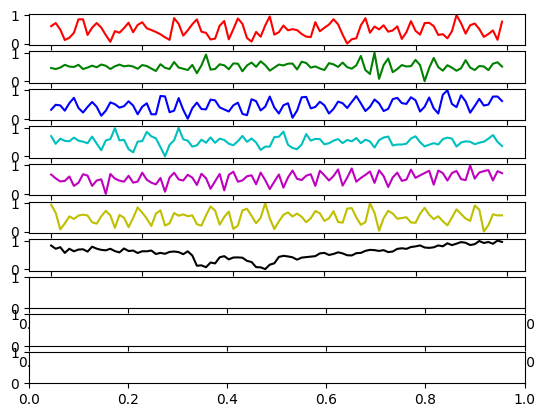

In [4]:
for i in range(0,10):
    plt.subplot(10,1,i+1)
    #different color for different data
    th=10
    if i == 0:
        plt.plot(data1[i][th],'r') 
    elif i == 1:
        plt.plot(data1[i][th],'g') 
    elif i == 2:
        plt.plot(data1[i][th],'b') 
    elif i == 3:
        plt.plot(data1[i][th],'c') 
    elif i == 4:
        plt.plot(data1[i][th],'m') 
    elif i == 5:
        plt.plot(data1[i][th],'y') 
    elif i == 6:
        plt.plot(data1[i][th],'k')  




plt.show()

In [5]:
data1_array = np.array(data1)
data1_harm  = []
data1_label = []
n = 0
# TODO create the label Y
for i in data1_array:
    
    '''
    if n == 5 or n == 7:
        tmp = np.ones((len(i),1)) * n
        data1_label.append(tmp)
        data1_harm.append(i)
    '''
    tmp = np.ones((len(i),1)) * n
    data1_label.append(tmp)
    
    n = n + 1

data1_label = np.array(data1_label)
#data1_harm = np.array(data1_harm)


data1_label = data1_label.reshape(-1,1)
data1_array = data1_array.reshape(-1,100)
#data1_harm = data1_harm.reshape(-1,100)

In [6]:
x_train,x_test,y_train,y_test = train_test_split(data1_array,data1_label,test_size=0.2,random_state=121323)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(448, 100)
(112, 100)
(448, 1)
(112, 1)


In [17]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=16, kernel_size=3, activation='relu', input_shape=(100, 1)),

  tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation='relu'),
  tf.keras.layers.Conv1D(filters=8, kernel_size=3, activation='relu'),
  
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(7, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100)
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print("Test loss:", test_loss)
print("Test acc:", test_acc)
model.summary()

Epoch 1/100
14/14 [==============================] - 0s 4ms/step - loss: 1.9562 - accuracy: 0.1228
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 1.9408 - accuracy: 0.1674
Epoch 3/100
14/14 [==============================] - 0s 3ms/step - loss: 1.9277 - accuracy: 0.2054
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 1.8900 - accuracy: 0.2812
Epoch 5/100
14/14 [==============================] - 0s 2ms/step - loss: 1.8210 - accuracy: 0.3482
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 1.7575 - accuracy: 0.3504
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 1.6653 - accuracy: 0.4018
Epoch 8/100
14/14 [==============================] - 0s 3ms/step - loss: 1.5872 - accuracy: 0.4353
Epoch 9/100
14/14 [==============================] - 0s 2ms/step - loss: 1.4823 - accuracy: 0.4754
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 1.3966 - accuracy: 0.5045
Epoch 11/

4/4 [==============================] - 0s 1ms/step
[[4.72462773e-01 5.27291536e-01 2.87544822e-07 2.45414616e-04
  1.12651457e-12 5.94768377e-16 1.07161281e-17]
 [1.72678847e-03 2.50610407e-03 3.16322416e-06 9.50956821e-01
  4.07890679e-04 4.43986207e-02 6.15173008e-07]
 [3.82947792e-06 9.68350378e-06 1.01459906e-01 4.09650733e-04
  1.04661717e-03 8.96991134e-01 7.92842256e-05]
 [2.61331022e-01 4.45996493e-01 8.40427354e-03 2.83854246e-01
  2.28197241e-04 4.73819910e-07 1.85264988e-04]
 [4.36573243e-03 9.95625734e-01 3.87589054e-08 8.47047977e-06
  1.53394120e-15 9.05805069e-16 7.41900608e-18]
 [2.34644922e-05 1.29767752e-03 3.73474834e-10 9.98552859e-01
  1.87201223e-07 1.38247191e-11 1.25844497e-04]
 [3.33326638e-01 7.41624535e-06 1.15529315e-06 5.93772818e-08
  6.66662514e-01 2.21006621e-06 3.01322913e-08]
 [1.27307885e-07 1.79549369e-14 9.99893308e-01 1.90520924e-16
  3.90366830e-13 1.06532731e-04 8.81935063e-12]
 [8.06114674e-01 1.50063828e-01 2.99970998e-04 4.35181111e-02
  3.219

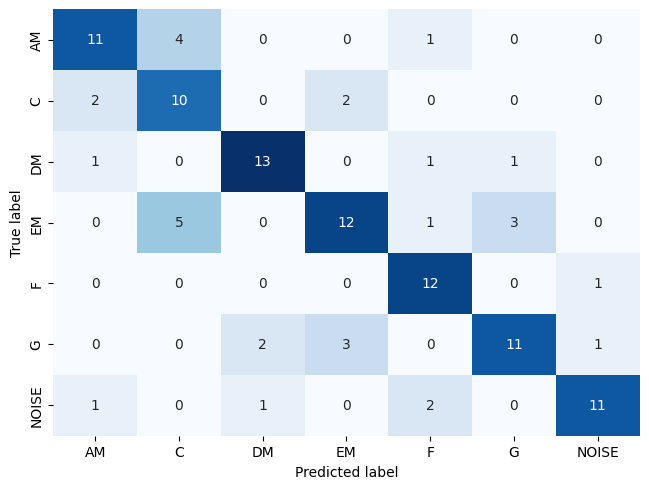

In [18]:

%matplotlib inline
'''1E.txt
2B.txt
3G.txt
AM.txt
C.txt
DM.txt
EM.txt
F.txt
G.txt
NOISE.txt'''

labels =   ['AM','C','DM','EM','F','G','NOISE']
Y_pred = model.predict(x_test)
print(Y_pred)
y_pred = np.argmax(Y_pred, axis=1)
confusion_matrix = tf.math.confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(confusion_matrix,
            annot=True,
            xticklabels=labels,
            yticklabels=labels,
            cmap=plt.cm.Blues,
            fmt='d', cbar=False)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [19]:
# TODO : save the model


model.save('model_100in_1213_nosigal.h5')  # creates a HDF5 file 'my_model.h5'

f:\ANACONDA\envs\pt\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
